In [22]:
import numpy as np
from graspy.simulations import sample_edges
from graspy.plot import heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import warnings
from simulations_corr_copy import sample_edges_corr, er_corr, sbm_corr

definite simulated P and Rho matrices


In [23]:
p = 0.5
r = 0.3
dim = 100
P = p * np.ones((dim,dim))
R = r * np.ones((dim,dim))

tests for properties of sample_corr function



mean of revised probabilities of graph1 is  0.4999472222222222
mean of revised probabilities of graph2 is  0.4998484848484848


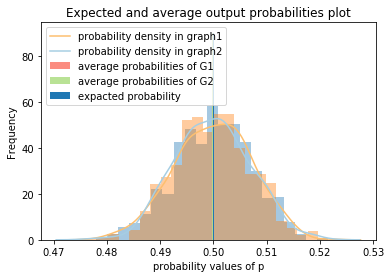

In [24]:
# return prob of G2 without diagnal elements
def test_sample_edges_corr_p(P, R, directed=False, loops=False):
    n = np.size(P,1)
    A, B = sample_edges_corr(P, R, directed=False, loops=False)
    prob1 = A.sum()/(n*(n-1))
    prob2 = B.sum()/(n*(n-1))
    return prob1, prob2

# show the PDF of 1 probability of G2
def density_sample_edges_corr_p(n):
    folder1=[]
    folder2=[]
    k1 = 0
    k2 = 0
    sum1 = 0
    sum2 = 0
    for i in range (n):
        k1, k2 = test_sample_edges_corr_p(P, R, directed=False, loops=False)
        folder1.append(k1)
        folder2.append(k2)
    folder1.sort()
    folder2.sort()
    m1 = np.mean(folder1)
    m2 = np.mean(folder2)
    print(f'mean of revised probabilities of graph1 is ',m1)
    print(f'mean of revised probabilities of graph2 is ',m2)

    x1 = p
    
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"probability density in graph1","color":"#fdbf6f"})
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"probability density in graph2","color":"#a6cee3"})
    plt.bar(m1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of G1')
    plt.bar(m2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of G2')
    plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()
density_sample_edges_corr_p(800)

0.30079090909090916


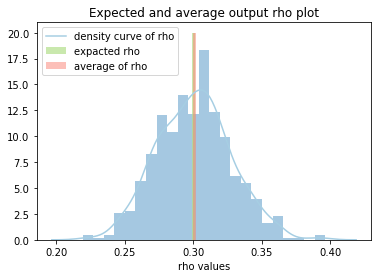

In [25]:
def test_sample_edges_corr_rho(pairs):
    folder2 = []
    h=0
    for i in range (pairs):
        n = np.size(P,1)
        g1, g2 = sample_edges_corr(P, R, directed=False, loops=False)
        P0 = np.copy(g1)
        add = g1+g2
        add[add!=2] = 0
        k = (add.sum()/2)/(n*(n-1))
        r = np.abs((k-p**2)/(p-p**2))
        folder2.append(r)
        h += r
    folder2.sort()
    avr = h/pairs
    print(avr)

    %matplotlib inline
    x2 = 0.3
    sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 20, width=0.002, alpha = 0.7, color='#b2df8a',label='expacted rho')
    plt.bar(avr, 20, width=0.002, alpha = 0.5, color='#fb8072',label='average of rho')
    plt.legend(loc='upper left')
    plt.title('Expected and average output rho plot')
    plt.show()

test_sample_edges_corr_rho(800)

Expetation of the similarity is 
$p*[p+\rho*(1-p)] + (1-p)*[1-p*(1-\rho)]$.

If we output the simulated results from this function, 

we can see the results is close to what we expect:

In [26]:
# we can check the similarity between graph pairs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def test_sample_edges_corr_same(n):
    S = []
    judge = []
    dim = np.size(P,1)
    for i in range(n):
        A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
        judge = (A == B)+0
        S.append(judge)
    similarity = (np.sum(S)-dim*n)/(n*dim*(dim-1))
    return similarity
result = test_sample_edges_corr_same(1000)
m = p*(p+rho*(1-p)) + (1-p)*(1-p*(1-rho))
print(f'The calculated result of similarity is', result)
print(f'The expected result of similarity is', m)
print(f'The absolute difference is', (abs(result-m)/m)*100,'%')

The calculated result of similarity is 0.6501842424242424
The expected result of similarity is 0.65
The absolute difference is 0.028344988344987707 %


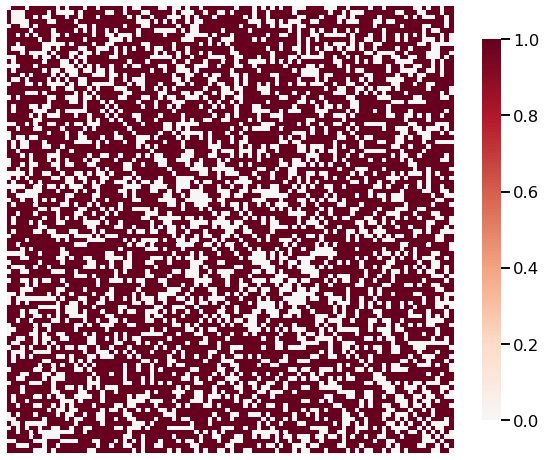

In [27]:
# show positions of the same values in both graphs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def show_sample_edges_corr_same():
    judge = []
    A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
    judge = (A == B)+0
    heatmap(judge - np.diag(np.diag(judge)))
show_sample_edges_corr_same()

For er_corr function:

In [28]:
n = 100
p = 0.5
r = 0.3

mean of revised probabilities of graph1 is  0.500224494949495
mean of revised probabilities of graph2 is  0.4999661616161616


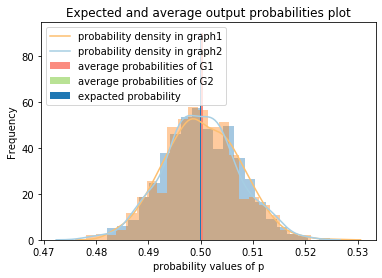

In [29]:
def test_er_corr_p(n, p, r, directed=False, loops=False):
    A, B = er_corr(n, p, r, directed=False, loops=False)
    prob1 = A.sum()/(n*(n-1))
    prob2 = B.sum()/(n*(n-1))
    return prob1, prob2

# show the PDF of 1 probability of G2
def density_er_corr_p(times):
    folder1=[]
    folder2=[]
    k1 = 0
    k2 = 0
    sum1 = 0
    sum2 = 0
    for i in range (times):
        k1, k2 = test_er_corr_p(n, p, r, directed=False, loops=False)
        folder1.append(k1)
        folder2.append(k2)
    folder1.sort()
    folder2.sort()
    m1 = np.mean(folder1)
    m2 = np.mean(folder2)
    print(f'mean of revised probabilities of graph1 is ',m1)
    print(f'mean of revised probabilities of graph2 is ',m2)

    x1 = p
    
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"probability density in graph1","color":"#fdbf6f"})
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"probability density in graph2","color":"#a6cee3"})
    plt.bar(m1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of G1')
    plt.bar(m2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of G2')
    plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()
density_er_corr_p(800)

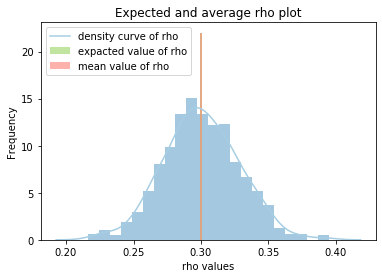

In [30]:
n = 100
p = 0.5
r = 0.3
def test_er_corr_rho(n, p, r, directed=False, loops=False):
    g1, g2 = er_corr(n, p, r, directed=False, loops=False)
    P0 = np.copy(g1)
    add = g1+g2
    add[add!=2] = 0
    k = (add.sum()/2)/(n*(n-1))
    l = np.abs((k-p**2)/(p-p**2))
    return l
   
def density_er_corr_rho(pairs):
    folder2 = []
    h = 0
    l = 0
    for i in range (pairs):
        l = test_er_corr_rho(n, p, r, directed=False, loops=False)
        folder2.append(l)
        h += l
    
    folder2.sort()
    avr = h/pairs

    %matplotlib inline
    x2 = r
    sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 22, width=0.0015, alpha = 0.8, color='#b2df8a',label='expacted value of rho')
    plt.bar(avr, 22, width=0.0015, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()

density_er_corr_rho(800)